# Assignment 1: Predicting Employee Attrition with Random Forests

Execute cells **top to bottom**. Where you see `# TODO`, add your code.

**Data:** `data/IBM_HR_Employee_Attrition.csv`

**Deliverables produced in this file:**
- Baseline Decision Tree metrics (accuracy, precision, recall)
- Random Forest metrics + side-by-side comparison table
- Feature importance visualization
- Markdown sections for **Key Drivers of Attrition** and **Reflection**

### Download Dependencies
Run this cell once to install all dependencies. These can also be run directly in the terminal if you prefer.


In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
print("Importing required libraries...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print("✓ All libraries imported successfully!\n")

Importing required libraries...
✓ All libraries imported successfully!



### Step 1: Load the dataset
----------------------------------------------------------------------------
Confirm the CSV can be read and preview the first rows. The following code should output the first 5 rows of the IBM HR data.

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
print("Loading employee attrition dataset...")
df = pd.read_csv('./data/IBM_HR_Employee_Attrition.csv')
print("✓ Dataset loaded successfully!\n")

# Display first few rows to verify load
print("First 5 rows of the dataset:")
print(df.head())

# Display basic info about the dataset
print("\nDataset Information:")
print(df.info())

print("\n" + "="*80)
print("CHECKPOINT: Verify that the dataset loaded correctly and you can see column names")
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("="*80 + "\n")

Loading employee attrition dataset...
✓ Dataset loaded successfully!

First 5 rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical           

### Step 2: Explore and Prepare the Dataset
----------------------------------------------------------------------------
Perform the same kind of exploratory analysis real data scientists do before building a model

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

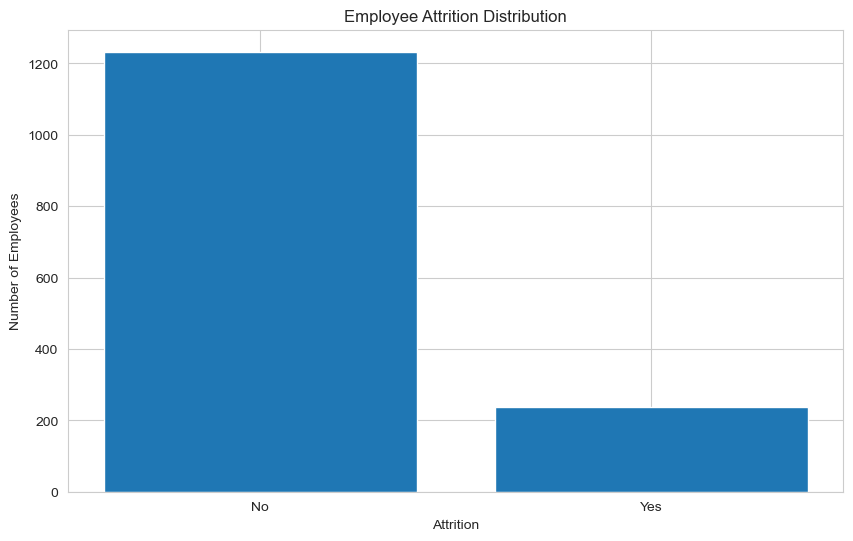


CHECKPOINT: X_cleaned should have all numeric columns, y should contain Attrition values
X_cleaned shape: (1470, 47)
y shape: (1470,)



In [16]:
# Display summary statistics
# TODO: Use df.describe() and df.info() to generate summary statistics for numeric features
print(df.describe())
print(df.info())


# Plot attrition counts to see class imbalance
# TODO: Use df['Attrition'].value_counts() and create a visualization using matplotlib to see how imbalanced the dataset is
a_c=df['Attrition'].value_counts()
print(a_c)
plt.bar(a_c.index,a_c.values)
plt.title('Employee Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()


# Encode categorical variables
# TODO: Use pd.get_dummies() to encode categorical variables
# Store the result in a variable (you'll need this for the next step)
df_encoded=pd.get_dummies(df,drop_first=True)

# Split features (X) from target (y)
# TODO: Create X_cleaned with all columns except 'Attrition'
# TODO: Create y with just the 'Attrition' column
X_cleaned = df_encoded.drop('Attrition_Yes',axis=1)
y = df_encoded['Attrition_Yes']


print("\n" + "="*80)
print("CHECKPOINT: X_cleaned should have all numeric columns, y should contain Attrition values")
print(f"X_cleaned shape: {X_cleaned.shape if X_cleaned is not None else 'Not yet defined'}")
print(f"y shape: {y.shape if y is not None else 'Not yet defined'}")
print("="*80 + "\n")

### Step 3: Train a Baseline Decision Tree Model
----------------------------------------------------------------------------
Build a baseline decision tree for comparison

In [17]:
# Split data into training and test sets
# TODO: Use train_test_split with test_size=0.2, random_state=42, stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Train a decision tree classifier
# TODO: Initialize DecisionTreeClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# TODO: Fit the model on training data
dt_model.fit(X_train, y_train)

# Make predictions on test set
# TODO: Use dt_model.predict() on X_test
dt_predictions = dt_model.predict(X_test)

# Calculate evaluation metrics
# TODO: Calculate accuracy, precision, and recall for the decision tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)


# Print results
print("\n" + "="*80)
print("BASELINE DECISION TREE RESULTS")
print("="*80)
# TODO: Print accuracy, precision, and recall with clear labels
print(f"Accuracy: {dt_accuracy if dt_accuracy is not None else 'Not yet calculated'}")
print(f"Precision: {dt_precision if dt_precision is not None else 'Not yet calculated'}")
print(f"Recall: {dt_recall if dt_recall is not None else 'Not yet calculated'}")
print("="*80 + "\n")


BASELINE DECISION TREE RESULTS
Accuracy: 0.8027210884353742
Precision: 0.3877551020408163
Recall: 0.40425531914893614



### Step 4: Build and Evaluate a Random Forest Model
----------------------------------------------------------------------------
Move beyond a single tree to a more powerful ensemble model

In [28]:
# Move beyond a single tree to a more powerful ensemble model

# Train a random forest classifier
# TODO: Initialize and train a RandomForestClassifier with these parameters:
rf_model=RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=2,
max_features='sqrt', class_weight='balanced', random_state=42)
rf_model.fit (X_train, y_train)

# Make predictions using probability threshold
# TODO: Use rf_model.predict_proba() to get probabilities for the positive class
# TODO: Apply a threshold of 0.35 to convert probabilities to predictions
# (rf_probabilities >= 0.35).astype(int)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
rf_predictions = (rf_probabilities >= 0.35).astype(int)


# Calculate evaluation metrics
# TODO: Calculate accuracy, precision, and recall for the random forest
rf_accuracy = accuracy_score(y_test,rf_predictions)
rf_precision = precision_score(y_test,rf_predictions)
rf_recall = recall_score(y_test,rf_predictions)

# Print results
print("\n" + "="*80)
print("RANDOM FOREST RESULTS")
print("="*80)
print(f"Accuracy: {rf_accuracy if rf_accuracy is not None else 'Not yet calculated'}")
print(f"Precision: {rf_precision if rf_precision is not None else 'Not yet calculated'}")
print(f"Recall: {rf_recall if rf_recall is not None else 'Not yet calculated'}")
print("="*80 + "\n")

# Create comparison table
# TODO: Create a pandas DataFrame comparing both models side-by-side
# Columns: Model, Accuracy, Precision, Recall
model_comparison = model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [dt_accuracy, rf_accuracy],
    'Precision': [dt_precision, rf_precision],
    'Recall': [dt_recall, rf_recall]
})
print(model_comparison)

# TODO: Display the comparison table
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
# Display table here
print("="*80 + "\n")


RANDOM FOREST RESULTS
Accuracy: 0.7959183673469388
Precision: 0.4
Recall: 0.5531914893617021

           Model  Accuracy  Precision    Recall
0  Decision Tree  0.802721   0.387755  0.404255
1  Random Forest  0.795918   0.400000  0.553191

MODEL COMPARISON



### Step 5: Interpret Feature Importances
----------------------------------------------------------------------------
Turn model results into actionable insights for HR

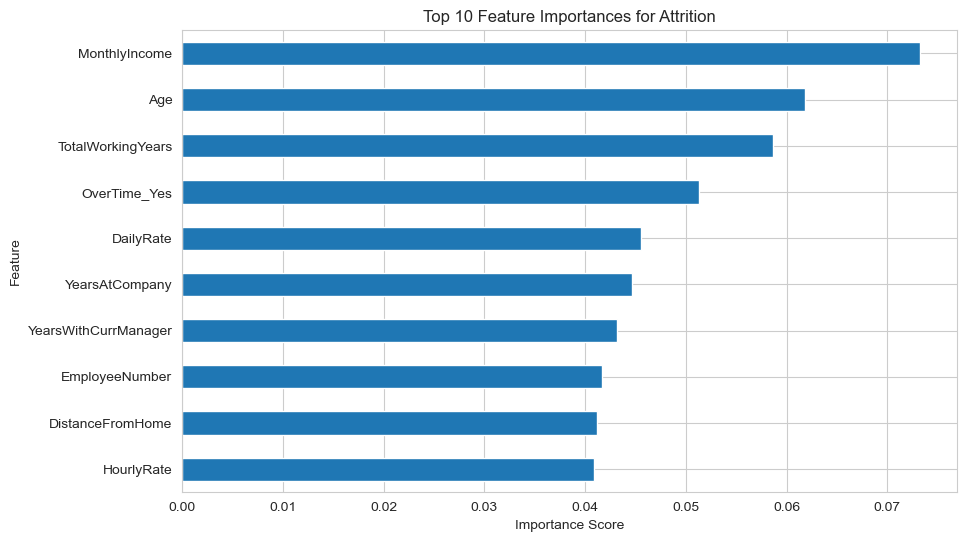


KEY DRIVERS OF ATTRITION


In [29]:
# Extract feature importances
# TODO: Get feature_importances_ from rf_model and create a pandas Series
# with feature names as index
feature_importances = feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=X_cleaned.columns
)


# TODO: Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# TODO: Get top 10 most important features
top_10_features = feature_importances.head(10)

# Visualize top 10 feature importances
# TODO: Create a horizontal bar plot of the top 10 features
# Use plt.barh() or top_10_features.plot(kind='barh')
top_10_features.sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importances for Attrition")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\n" + "="*80)
print("KEY DRIVERS OF ATTRITION")
print("="*80)

#### Key Drivers of Attrition
Write 3-5 bullet points explaining what the top factors reveal. Include at least one actionable takeaway for HR
- Monthlyincom is the most important predictor for attrition, it shows that employees with lower pay are significantly more likely to leave the organization. 
- Age ranks the 2nd highest, showing that younger employees expereicne higher attrition rates. 
- TotalWorkingYears is the 3rd most highest which shows that employees earlier in their career are more likely to leavae compared to those with more experience. 
- HR should begin implementing targeted retention programs for the early-career employees like competitive entry-level pay and a clear ladder for future roles. 

### Step 6: Reflection (150-200 words)
----------------------------------------------------------------------------
Write a 150-200 word reflection addressing:
- How the random forest improved upon the decision tree baseline
- When ensemble methods are worth the added complexity
- How these modeling skills connect to your final project

The random forest model performed better than the decision tree because it used many trees working together instead of relying on just one. The decision tree was easy to understand, but it did not always make accurate predictions and could overfit the data. The random forest improved the results by combining multiple trees, which helped it make more reliable predictions and better identify employees who were likely to leave.

Using an ensemble model like random forest is worth the extra complexity when the data has patterns that are not simple or when one outcome happens much more often than the other. In this case, employee attrition was imbalanced, so improving recall was important. By lowering the probability threshold, the model was able to catch more employees who might leave, even if it meant a few more incorrect predictions.

The feature importance results showed that MonthlyIncome, Age, and TotalWorkingYears were the biggest factors in predicting attrition. This suggests that younger employees with lower pay and less work experience are more likely to leave. These skills connect to my final project by showing how data can be used to understand real problems and make better decisions.

### Step 7: Push to GitHub
----------------------------------------------------------------------------
Once complete, save and push your work:
1. Save this file
2. Run in terminal:
```sh
git add .
git commit -m 'completed employee attrition assignment'
git push
```